In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

In [2]:
#Change the path while using according to location of training images
ds=os.listdir('./train')

In [3]:
X=[]
y=[]
for ix in range(len(ds)):
    img=cv2.imread('./train/'+ds[ix])
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    img=cv2.resize(img,(100,100))
    X.append(img)
    if ds[ix][:3]=='cat':
        y.append(0)
    else:
        y.append(1)
    
    

In [4]:
X=np.array(X)
y=np.array(y)


In [5]:
X=np.reshape(X,(X.shape[0],100,100,1))

In [6]:
print X.shape,y.shape

(25000, 100, 100, 1) (25000,)


In [7]:
import keras 
from keras.layers import Dense,Activation,Flatten,Reshape,Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential

Using Theano backend.


In [8]:
y=np_utils.to_categorical(y)

In [9]:
model=Sequential()
model.add(Convolution2D(32,4,4,input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Convolution2D(16,3,3))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 97, 97, 32)    544         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 97, 97, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 24, 24, 32)    0           activation_1[0][0]               
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 22, 22, 16)    4624        maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [10]:
model.fit(X[11000:14000,:,:],y[11000:14000,:])

Epoch 1/10
3000/3000 [==============================] - 20s - loss: 0.7051 - acc: 0.5187    
Epoch 2/10
3000/3000 [==============================] - 22s - loss: 0.6935 - acc: 0.5233    
Epoch 3/10
3000/3000 [==============================] - 22s - loss: 0.6866 - acc: 0.5490    
Epoch 4/10
3000/3000 [==============================] - 20s - loss: 0.6694 - acc: 0.5970    
Epoch 5/10
3000/3000 [==============================] - 20s - loss: 0.6744 - acc: 0.5920    
Epoch 6/10
3000/3000 [==============================] - 20s - loss: 0.6528 - acc: 0.6087    
Epoch 7/10
3000/3000 [==============================] - 23s - loss: 0.6490 - acc: 0.6160    
Epoch 8/10
3000/3000 [==============================] - 21s - loss: 0.6403 - acc: 0.6157    
Epoch 9/10
3000/3000 [==============================] - 22s - loss: 0.6220 - acc: 0.6580    
Epoch 10/10
3000/3000 [==============================] - 28s - loss: 0.6133 - acc: 0.6723    


Cat
Confindence Level : 0.78706


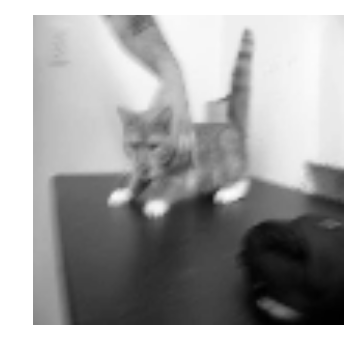

Cat
Confindence Level : 0.659895


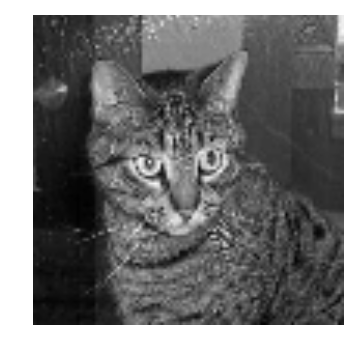

In [25]:
out=model.predict(X[:2])
out=np.array(out)
for ix in range(2):
    i_d=np.argmax(out[ix])
    if np.argmax(out[ix])==0:
        print 'Cat'
        print 'Confindence Level :',out[ix][i_d]
    else :
        print 'Dog'
    plt.imshow(np.reshape(X[ix],(100,100)),cmap='gray')
    plt.axis('off')
    plt.show()
    